# **Moniqo Group Project**

### **Data Cleaning** 

> -- Put any steps here

Step0. Load the Dataset
Step1. Handle Missing Values
Step2. Correct data types
Step3. Remove duplicates
Step4. Clean and Transform Text Data
Step5. Outlier Detection and Handling
Step6. Save the Cleaned Dataset

Step0. Load the Dataset

In [46]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# DATA_DIR = Path("data")  # adjust if needed
# pd.set_option("display.max_columns", 100)


In [47]:
# Load datasets

# Customers
data = pd.read_csv('repeat_loans_final.csv')
data.head()

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,Product,Branch,ClearDate,CustomerId,Gender,...,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,missed_instalments,Industry,Business Type,Year of Establishment
0,951920,6000,1750,7750.0,11/29/2025,5 WEEKS CREDIT EASE,ENGINEER,1/3/2026,1819,FEMALE,...,3500,1,500,29/11/2025,29/11/2025,0,5.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2017
1,951902,4000,1250,5250.0,11/28/2025,5 WEEKS CREDIT EASE,MOLO,1/2/2026,1818,FEMALE,...,2500,1,1550,28/11/2025,28/11/2025,0,4.0,Food & Hospitality,Retail Shop,2019
2,949962,4000,1250,5250.0,11/26/2025,5 WEEKS CREDIT EASE,ENGINEER,31/12/2025,1815,FEMALE,...,3500,1,1350,26/11/2025,26/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2014
3,949189,4000,1250,5250.0,11/25/2025,5 WEEKS CREDIT EASE,MOLO,30/12/2025,1814,FEMALE,...,1500,1,1000,25/11/2025,25/11/2025,0,4.0,Food & Hospitality,Green Grocery (Fruit/Vegetables),2018
4,948984,4000,1250,5250.0,11/24/2025,5 WEEKS CREDIT EASE,MOLO,29/12/2025,1813,FEMALE,...,1500,1,1550,24/11/2025,24/11/2025,0,4.0,Business & Information,Bureau & Publishing Services,2018


Step1. Handle Missing Values

In [48]:
# Find missing values
print(data.isnull().sum()) 

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
missed_instalments              2
Industry                        0
Business Type                   0
Year of Establishment           0
dtype: int64


In [49]:
# Drop missing value rows
data = data.dropna(subset=['missed_instalments'])

Step2. Correct data types

In [50]:
data['BorrowDate'] = pd.to_datetime(data['BorrowDate'])
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3570 entries, 0 to 3571
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LoanId                        3570 non-null   int64         
 1   AmountDisbursed               3570 non-null   int64         
 2   Interest                      3570 non-null   int64         
 3   LoanBalance                   3570 non-null   float64       
 4   BorrowDate                    3570 non-null   datetime64[ns]
 5   Product                       3570 non-null   object        
 6   Branch                        3570 non-null   object        
 7   ClearDate                     3570 non-null   object        
 8   CustomerId                    3570 non-null   int64         
 9   Gender                        3570 non-null   object        
 10  LoanLimit                     3570 non-null   int64         
 11  CreditScore                   3570 

Step3. Remove duplicates

In [ ]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

# 0 duplicated rows

Empty DataFrame
Columns: [LoanId, AmountDisbursed, Interest, LoanBalance, BorrowDate, Product, Branch, ClearDate, CustomerId, Gender, LoanLimit, CreditScore, loan_repayment_txn_count, loan_repayment_total_paid, loan_repayment_first_payment, loan_repayment_last_payment, loan_overpayment, missed_instalments, Industry, Business Type, Year of Establishment]
Index: []

[0 rows x 21 columns]


Step4. Clean and Transform Text Data

In [51]:
## 5.1 Convert text to lowercase
data['Product'] = data['Product'].astype('string')
data['Branch'] = data['Branch'].astype('string')
data['Gender'] = data['Gender'].astype('string')
data['Industry'] = data['Industry'].astype('string')
data['Business Type'] = data['Business Type'].astype('string')
data.head(10)

data.to_csv("repeat_loans_cleaned_step2.csv", index=False)


Step5. Outlier Detection and Handling
01. AmountBisbursed

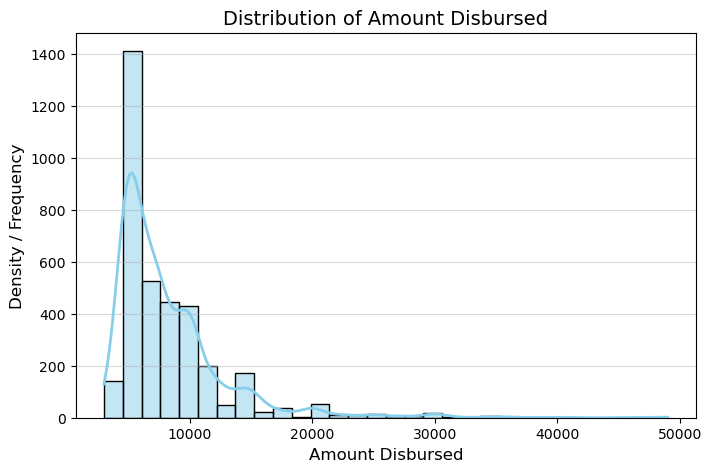

In [ ]:
# Using Bell curve to visualize 'AmountDisbursed' distribution

# Read data
data = pd.read_csv("repeat_loans_cleaned_step2.csv")
curve1 = data['AmountDisbursed']

# Set up the plot
plt.figure(figsize=(8, 5))

sns.histplot(curve1, bins=30, kde=True, color='skyblue', edgecolor='black',
             line_kws={'linewidth': 2, 'color': 'darkblue'})

plt.title('Distribution of Amount Disbursed', fontsize=14)
plt.xlabel('Amount Disbursed', fontsize=12)
plt.ylabel('Density / Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)

plt.show()

In [62]:
# Calculate mean and standard deviation
mu = curve1.mean()
sigma = curve1.std()

# Upper Bound = mu + 3 * sigma
# Lower Bound = mu - 3 * sigma
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

# Outliers detection
outliers = data[(data['AmountDisbursed'] < lower_bound) | (data['AmountDisbursed'] > upper_bound)]

# Print results
print(f"Mean (μ) of AmountDisbursed: {mu:,.2f}")
print(f"Standard Deviation (σ) of AmountDisbursed: {sigma:,.2f}")
print(f"Lower Bound (μ - 3σ): {lower_bound:,.2f}")
print(f"Upper Bound (μ + 3σ): {upper_bound:,.2f}")
print(f"\nNumber of Outliers: {len(outliers)}")
print(f"Percentage of Outliers: {len(outliers) / len(data) * 100:.2f}%")

Mean (μ) of AmountDisbursed: 8,304.48
Standard Deviation (σ) of AmountDisbursed: 4,759.91
Lower Bound (μ - 3σ): -5,975.26
Upper Bound (μ + 3σ): 22,584.22

Number of Outliers: 74
Percentage of Outliers: 2.07%


2. LoanLimit

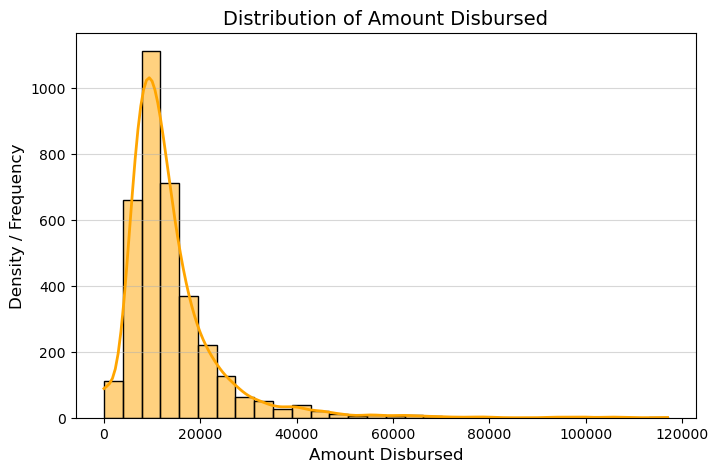

In [63]:
# Using Bell curve to visualize 'AmountDisbursed' distribution

# Read data
data = pd.read_csv("repeat_loans_cleaned_step2.csv")
curve2 = data['LoanLimit']

# Set up the plot
plt.figure(figsize=(8, 5))

sns.histplot(curve2, bins=30, kde=True, color='orange', edgecolor='black',
             line_kws={'linewidth': 2, 'color': 'darkblue'})

plt.title('Distribution of Amount Disbursed', fontsize=14)
plt.xlabel('Amount Disbursed', fontsize=12)
plt.ylabel('Density / Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)

plt.show()

In [65]:
# Calculate mean and standard deviation
mu = curve2.mean()
sigma = curve2.std()

# Upper Bound = mu + 3 * sigma
# Lower Bound = mu - 3 * sigma
lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

# Outliers detection
outliers = data[(data['LoanLimit'] < lower_bound) | (data['LoanLimit'] > upper_bound)]

# Print results
print(f"Mean (μ) of AmountDisbursed: {mu:,.2f}")
print(f"Standard Deviation (σ) of AmountDisbursed: {sigma:,.2f}")
print(f"Lower Bound (μ - 3σ): {lower_bound:,.2f}")
print(f"Upper Bound (μ + 3σ): {upper_bound:,.2f}")
print(f"\nNumber of Outliers: {len(outliers)}")
print(f"Percentage of Outliers: {len(outliers) / len(data) * 100:.2f}%")

Mean (μ) of AmountDisbursed: 13,763.39
Standard Deviation (σ) of AmountDisbursed: 10,325.69
Lower Bound (μ - 3σ): -17,213.67
Upper Bound (μ + 3σ): 44,740.45

Number of Outliers: 75
Percentage of Outliers: 2.10%


Step6. Save the Cleaned Dataset

In [66]:
data.to_csv('cleaned_dataset.csv', index=False)